## Лабораторная работа №8. Гауссовская и лапласовская пирамида изображений

In [24]:
from skimage.io import imread, imshow
from skimage.filters import gaussian
from numpy.fft import fft2, fftshift, ifft2
import numpy as np
import matplotlib.pyplot as plt
# from skimage.transform import fftshift
%matplotlib inline

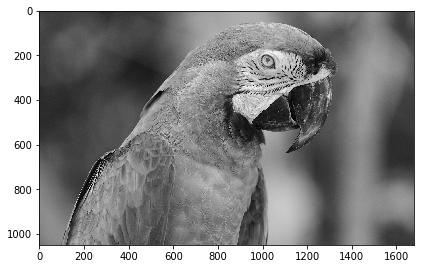

In [87]:
im = imread('parrot.png', as_grey=True)
imshow(im)
im_fur = fft2(im)

Задание №1. Постройте гауссовскую пирамиду изображения из не менее чем пяти слоев. Визуализируйте полученные изображения и амплитуды частот изображений пирамиды (код можно найти в видео про преобразование Фурье) и убедитесь, что на каждом слое диапазон частот сужается. Постройте пирамиду для трех различных значения сигмы гауссовского ядра. Для удобства экспериментирования определите отдельную ФУНКЦИЮ построения гауссовской пирамиды с параметрами img (изображение, по которому строится пирамида), sigma (параметр гауссовского ядра), n_layers (количество слоев пирамиды), возвращающую списки необходимых изображений.

In [88]:
def build_gauss_pyramid(img, sigma, n_layers):
    imgs = np.ndarray((n_layers, img.shape[0], img.shape[1]), dtype=np.float)
    fouries = np.ndarray((n_layers, img.shape[0], img.shape[1]), dtype=np.complex)
    # Инициализация изображения Фурье для исходной картинки 
    IMG = fft2(img)
    # Построение гауссовского фильтра 
    filt_gauss = np.zeros(img.shape)
    filt_gauss[img.shape[0] // 2, img.shape[1] // 2] = 1
    filt_gauss = gaussian(filt_gauss, sigma = sigma)
    # инициализация изображения Фурье гауссовского фильтра
    FILT = abs(fft2(filt_gauss))
    for it in np.arange(n_layers):
        fouries[it] = IMG * FILT
        imgs[it] = ifft2(fouries[it]).real
        IMG = fouries[it]
    return imgs, fouries

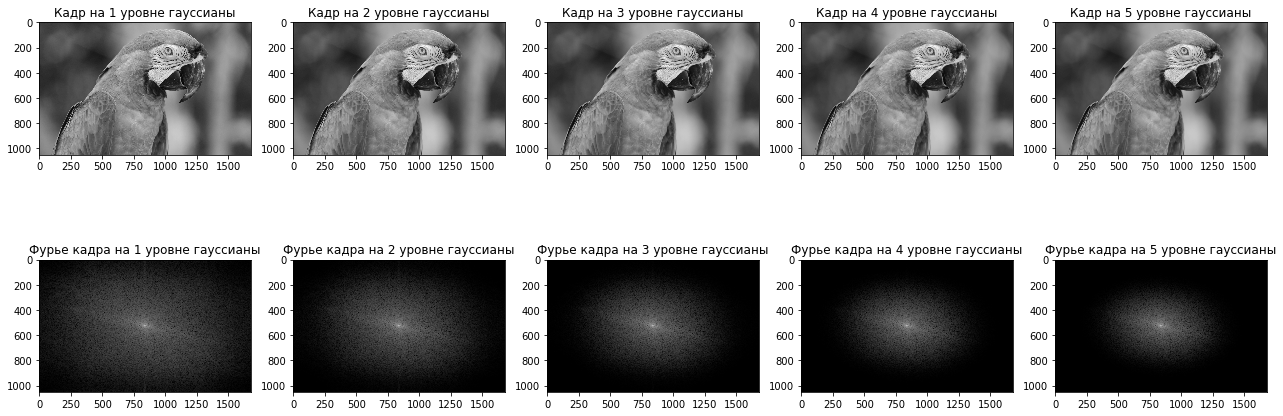

In [89]:
sigma = 0.7
n_layers = 5
imgs, fouries_gaus = build_gauss_pyramid(im, sigma, n_layers)
plt.figure(figsize = (22,8))
for it in np.arange(n_layers):
    plt.subplot(2, n_layers, 1 * it + 1)
    plt.imshow(imgs[it], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.title('Кадр на %u уровне гауссианы' % (it + 1))
    plt.subplot(2, n_layers, 1 * it + 6)
    Xim = np.log(1 + abs(fftshift(fouries_gaus[it])))
    plt.imshow(Xim, cmap=plt.get_cmap('gray'), vmin=0, vmax=15)
    plt.title('Фурье кадра на %u уровне гауссианы' % (it + 1))

Задание №2. Проведите аналогичные эксперименты с лапласовской пирамидой. Функция для построения лапласовской пирамиды должна использовать функцию построения гауссовской пирамиды и иметь, как и функция гауссовской пирамиды, параметры img, sigma и n_layers.

In [90]:
def build_laplas_pyramid(img, sigma, n_layers):
    imgs_gaus, fouries_gaus = build_gauss_pyramid(img, sigma, n_layers)
    imgs = np.ndarray((n_layers + 1, img.shape[0], img.shape[1]), dtype=np.float64)
    fouries_lap = np.ndarray((n_layers + 1, img.shape[0], img.shape[1]), dtype=np.complex)
    for it in np.arange(n_layers):
        if it == 0:
            imgs[it] = img - imgs_gaus[it]
            fouries_lap[it] = fft2(img) - fouries_gaus[it]
        else:
            imgs[it] = imgs_gaus[it - 1] - imgs_gaus[it]
            fouries_lap[it] = fouries_gaus[it-1] - fouries_gaus[it]
    fouries_lap[n_layers] = fouries_gaus[-1]
    imgs[n_layers] = imgs_gaus[-1]
    return imgs, fouries_lap

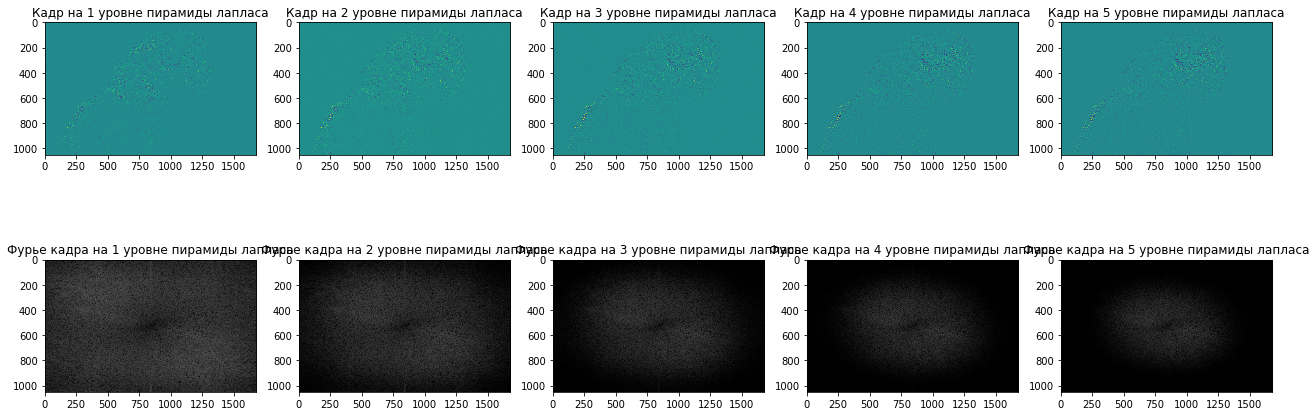

In [91]:
imgs, fouries_lap = build_laplas_pyramid(im, sigma, n_layers)
plt.figure(figsize = (22,8))
for it in np.arange(n_layers):
        plt.subplot(2, n_layers, 1 * it + 1)
        plt.imshow(imgs[it], cmap=plt.get_cmap('viridis'))
        plt.title('Кадр на %u уровне пирамиды лапласа' % (it + 1))
        plt.subplot(2, n_layers, 1 * it + n_layers + 1)
        Xim = np.log(1 + abs(fftshift(fouries_lap[it])))
        plt.imshow(Xim, cmap=plt.get_cmap('gray'), vmin=0, vmax=15)
        plt.title('Фурье кадра на %u уровне пирамиды лапласа' % (it + 1))

In [92]:
# Код вывода изображений

Задание №3. Какие уровни гауссовской и лапласовской пирамид необходимо просуммировать, чтобы получить исходное изображение?

In [93]:
len(fouries_lap)

6

/Users/Vasily/.virtualenvs/cv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


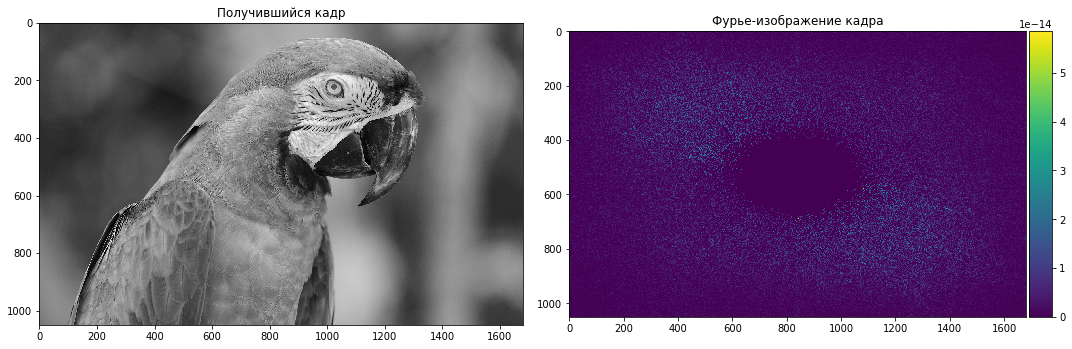

In [97]:
plt.figure(figsize = (15,30))
plt.subplot(n_layers, 2, 1)
im_new = abs(ifft2(fouries_lap.sum(axis=0)))
plt.title('Получившийся кадр')
imshow(im_new)
plt.subplot(n_layers, 2, 2)
Xim = np.log(1 + abs(fftshift(im_fur - fouries_lap.sum(axis=0))))
plt.title('Фурье-изображение кадра')
imshow(Xim)

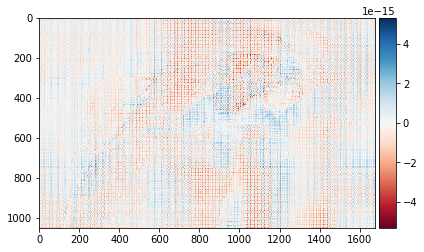

In [95]:
imshow(im - im_new)